<a href="https://colab.research.google.com/github/av1155/TensorFlow/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # 128 neurons in the first hidden layer
    Dropout(0.3),  # Dropout layer with a 0.3 dropout rate
    Dense(64, activation='relu'),   # 64 neurons in the second hidden layer
    Dense(10, activation='softmax') # Output layer with 10 classes (0-9)
])

# Define hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 50


In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
636/844 [=====================>........] - ETA: 3s - loss: 0.4195 - accuracy: 0.8736

313/313 [==============================] - 2s 5ms/step - loss: 0.0775 - accuracy: 0.9773
Test accuracy: 97.73%


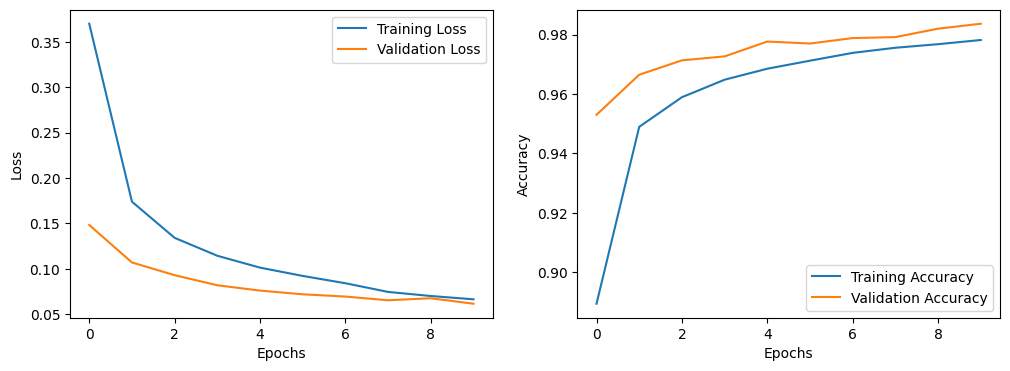

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Optionally, you can plot training/validation loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()


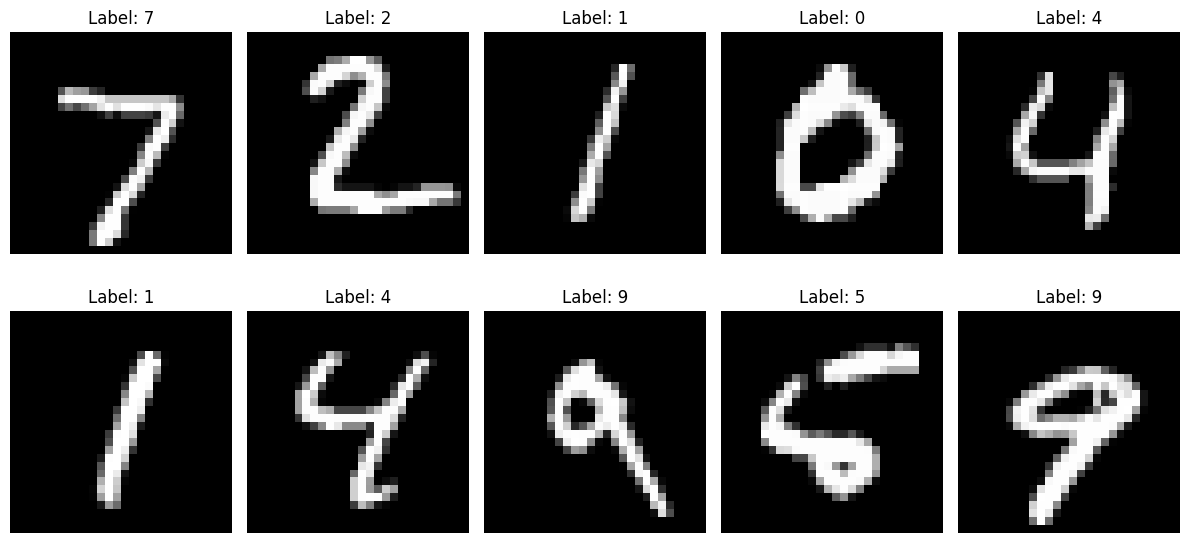

In [ ]:

num_images_to_plot = 10

plt.figure(figsize=(12, 6))
for i in range(num_images_to_plot):
    plt.subplot(2, num_images_to_plot // 2, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_test[i])}")
    plt.axis('off')

plt.tight_layout()

plt.show()

In [ ]:
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[3.4717958e-11, 1.1165963e-09, 6.2039042e-08, ..., 9.9999899e-01,
        4.4146717e-10, 5.9336628e-07],
       [5.1378239e-09, 5.5180321e-06, 9.9996501e-01, ..., 2.8510787e-13,
        1.5019032e-07, 6.3656164e-12],
       [2.4905592e-08, 9.9991566e-01, 5.1467387e-06, ..., 1.4152055e-05,
        3.5880359e-05, 6.6251332e-08],
       ...,
       [1.5189904e-13, 3.6004275e-13, 2.0812423e-12, ..., 4.6162320e-08,
        3.8956480e-10, 4.7980532e-08],
       [1.2068729e-10, 1.5013970e-09, 8.7445506e-14, ..., 1.5097873e-10,
        7.6634524e-06, 2.8649857e-10],
       [3.1571756e-10, 9.4704816e-16, 7.9361457e-12, ..., 5.9542806e-16,
        1.3058359e-12, 4.2858498e-14]], dtype=float32)

1/1 [==============================] - 0s 35ms/step


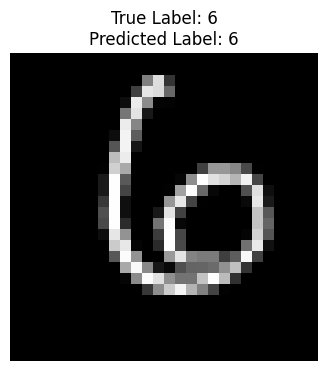

In [ ]:
import numpy as np

sample_index = 100

sample_data = x_test[sample_index]
sample_label = np.argmax(y_test[sample_index])

predicted_probs = model.predict(np.expand_dims(sample_data, axis=0))
predicted_label = np.argmax(predicted_probs)

plt.figure(figsize=(4, 4))
plt.imshow(sample_data, cmap='gray')
plt.title(f"True Label: {sample_label}\nPredicted Label: {predicted_label}")
plt.axis('off')
plt.show()


313/313 [==============================] - 1s 4ms/step
Accuracy: 97.73%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



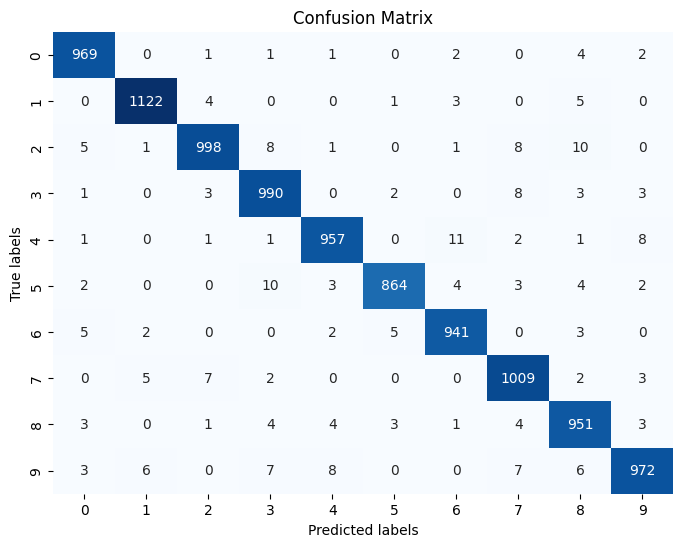

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
